## Inteligencia Artificial
#### Laboratorio 03
Autores:
- Mark Albrand/
- Jimena Hernández/
- Melissa Perez/

## Task 1 - Preguntas Teóricas
Responda a cada de las siguientes preguntas de forma clara y lo más completamente posible.
1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features
(feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más
apropiada.

3. Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.

## Task 2 - Ejercicios Prácticos

### Task 2.1 - Gradiente Descendiente Estocástico
Usando como polinomio: 2x^3 - 3x^2 + 5x + 3, implemente el algoritmo de gradiente descendiente estocástico, el descenso de gradiente por mini batches y el descenso de gradiente. 

In [2]:
# Gradiente descendiente estocástico
import numpy as np 

In [4]:
polinomio = [2, -3, 5, 3]  # 2x^3 - 3x^2 + 5x + 3
polinomio

[2, -3, 5, 3]

In [60]:
X = np.array([[1], [2], [3], [4], [5]])
y = []

for x in X:
    y.append(np.polyval(polinomio, x))

X = np.concatenate([np.ones((len(X), 1)), X], axis=1)

array([7])

In [46]:
w = np.zeros((4,1))

alpha = 0.001  # Tasa de aprendizaje
iteraciones = 100000  # Número de iteraciones

In [61]:
def gradiente_polinomio(X):
    derivada = np.polyder(polinomio)
    return np.polyval(derivada, X)

In [47]:
def cost_function(X, y, w):
    m = len(y)
    return 1/(2*m) * np.sum((X.dot(w) - y)**2)

In [ ]:
def gradient(X, y, w):
    m = len(y)
    

In [53]:
def stochastic_gradient_descent(X, y, w, alpha, iteraciones):
    graph = np.zeros(iteraciones)
    m = len(y)
    for i in range(iteraciones):
        randon_index = np.random.randint(0,m)

        xi = X[randon_index:randon_index+1].reshape(1, -1)
        yi = y[randon_index:randon_index+1].reshape(1, -1)

        gradients = 
        w = w - alpha * gradients
        graph[i] = cost_function(xi, yi, w)

    return w, graph

In [54]:
nuevos_w, graph = stochastic_gradient_descent(X, y, w, alpha, iteraciones)

ValueError: cannot reshape array of size 2 into shape (3,newaxis)

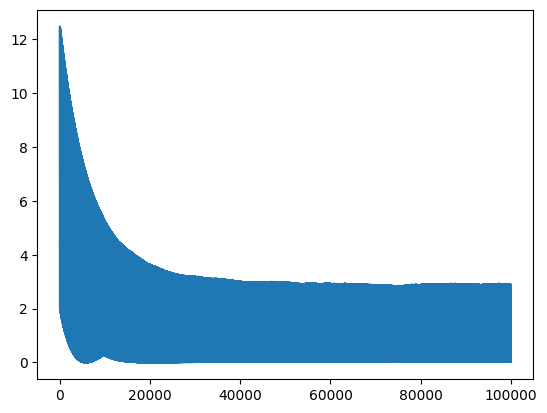

In [44]:
# graficar el costo
import matplotlib.pyplot as plt
plt.plot(graph)
plt.show()

In [45]:
print(nuevos_w)

[[0.6473674]
 [0.6496992]]


array([[1.2970666 ],
       [4.54556262]])

### Task 2.2 - Feature Selection

#### Método de filtrado

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
data = pd.read_csv('lol.csv')
data

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [ ]:
y = data['blueWins']
X = data.drop('blueWins', axis=1)

### Task 2.3 - Perceptrón